In [1]:
# Package imports
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [3]:
# Read CSVs
# Path to the folder where CSV files are stored
folder_path = "CSVs"

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Read and append each CSV into a list of DataFrames
df_list = []

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all DataFrames into one
df = pd.concat(df_list, ignore_index=True)

### Data Validation and Cleaning

In [5]:
for df_ in df_list:
    print(df_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96834 non-null  object 
 1   rideable_type       96834 non-null  object 
 2   started_at          96834 non-null  object 
 3   ended_at            96834 non-null  object 
 4   start_station_name  88209 non-null  object 
 5   start_station_id    88209 non-null  object 
 6   end_station_name    86557 non-null  object 
 7   end_station_id      86557 non-null  object 
 8   start_lat           96834 non-null  float64
 9   start_lng           96834 non-null  float64
 10  end_lat             96731 non-null  float64
 11  end_lng             96731 non-null  float64
 12  member_casual       96834 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49622 entries, 0 to 49621
Data columns (total 13 

##### Observation:
###### Seven columns have NO missing values:
- ride_id, rideable_type, started_at, ended_at, start_lat, start_lng, member_casual
###### Six columns contain missing values, but in consistent pairs:
Each of the following pairs shares the exact number of nulls:
- start_station_name & start_station_id
- end_station_name & end_station_id
- end_lat & end_lng

This indicates that missing data likely reflects entirely unrecorded station/location information, rather than random errors. This supports the internal consistency of the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


##### Observation:
The dataset contains approximately 5.6 million entries

In [9]:
# Checking for duplicates
df.duplicated().sum()

0

In [10]:
# Overall description of the dataframe
df.describe(include='all')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,5595063,5595063,5595063,5595063,4904254,4904257,4855893,4855893,5.595063e+06,5.595063e+06,5.590292e+06,5.590292e+06,5595063
unique,5595063,3,4677998,4671372,847,834,844,832,NaN,NaN,NaN,NaN,2
top,E19E6F1B8D4C42ED,classic_bike,2021-07-16 16:59:57,2021-09-16 08:39:10,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member
freq,1,3251028,7,17,82715,82715,83390,83390,NaN,NaN,NaN,NaN,3066058
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190107e+01,-8.764605e+01,4.190134e+01,-8.764626e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.608635e-02,2.872111e-02,4.618916e-02,2.889959e-02,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188155e+01,-8.766000e+01,4.188184e+01,-8.766000e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.189897e+01,-8.764182e+01,4.189964e+01,-8.764275e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.192914e+01,-8.762773e+01,4.192920e+01,-8.762775e+01,NaN


##### Observation 
Previous observations about null values can be reconfirmed here.
##### Handling null values
- Null values are not filled with arbitrary defaults to avoid introducing distortion into the analysis
- Null values are also not dropped outright, as the remaining columns in those rows may still contain valuable and usable information

In [12]:
# Ensuring the datetime columns are in the correct data type
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

In [13]:
print(df['started_at'].isna().sum())
print(df['ended_at'].isna().sum())

0
0


Converted started_at and ended_at to datetime format. All entries were valid; no missing or malformed timestamps detected.

In [15]:
# Remove records where ride ends before it starts. These are considered invalid entries due to timestamp inconsistencies.
df = df[df['ended_at'] >= df['started_at']]

In [16]:
# Checking no. of unique values in start_station_id and end_station_id
print(df['start_station_id'].nunique())
print(df['end_station_id'].nunique())

834
832


In [17]:
# Checking which values are extra
set(df['start_station_id'].unique()) - set(df['end_station_id'].unique())

{'20111', '427'}

##### Observation
The difference between values in start_station_id and end_station_id is minimal and so they likely represent valid stations

### Data Transformation

##### New columns: month, day_of_week, hour

In [21]:
df['month'] = df['started_at'].dt.month                
df['day_of_week'] = df['started_at'].dt.day_name()     
df['hour'] = df['started_at'].dt.hour                

##### New column: ride_duration

In [23]:
# Creating new column ride_duration (int datatype) using columns started_at and ended_at
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

##### Precision Improvement on lat lng columns

In [25]:
# Checking if a station ID is linked to more than one lat/lng pair 
df.groupby('start_station_id')[['start_lat', 'start_lng']].nunique()

,start_lat,start_lng
start_station_id,,
13001,3155,4110
13006,2641,2520
13008,2401,1676
13011,3202,3283
13016,3912,4042
...,...,...
TA1309000067,292,248
Throop/Hastings Mobile Station,2,2
WL-008,1347,1126


##### Observation
This is not expected. A single station ID should be associated with a single location. This might suggest GPS noise or inconsistent logging of station coordinates over time.

In [27]:
# Checking what happens when the lat and lng are rounded
(
    df.assign(
        start_lat_r = df['start_lat'].round(4),
        start_lng_r = df['start_lng'].round(4)
    )
    .groupby('start_station_id')[['start_lat_r', 'start_lng_r']]
    .nunique()
)

,start_lat_r,start_lng_r
start_station_id,,
13001,31,47
13006,31,28
13008,13,15
13011,31,39
13016,27,31
...,...,...
TA1309000067,3,3
Throop/Hastings Mobile Station,1,2
WL-008,7,6


##### Observation
Rounding coordinates to 4 decimal places significantly reduces the number of unique location values per start_station_id, which confirms the presence of GPS noise in the raw data
##### Handling inconsistency
This variation is handled through normalization to ensure that each station ID maps to a stable and reliable location.

In [29]:
# Normalization by picking the most frequently used coordinates (mode)
start_station_mode_coords = (
    df.groupby('start_station_id')[['start_lat', 'start_lng']]
    .agg(lambda x: x.mode().iloc[0])
    .reset_index()
)

# Replace inconsistent end_lat/lng by merging the mode value
df = df.drop(['start_lat', 'start_lng'], axis=1).merge(
    start_station_mode_coords, on='start_station_id', how='left'
)

In [30]:
# Repeating the process for end stations

# Reuse the same station-location mapping
end_station_mode_coords = start_station_mode_coords.rename(columns={
    'start_station_id': 'end_station_id',
    'start_lat': 'end_lat',
    'start_lng': 'end_lng'
})

df = df.drop(['end_lat', 'end_lng'], axis=1).merge(
    end_station_mode_coords, on='end_station_id', how='left'
)

##### New column: distance
It is computationally expensive to calculate distance for each row because pairs may be repeated.Hence, 
1. Creating a new table with unique start and end lat and lng pairs, and computing the distance.
2. Finally, merging the distance column with the main df.

In [32]:
# Step 1: Create a new table with unique start and end lat and lng pairs 
lat_lng_pairs = df[['start_lat','start_lng','end_lat','end_lng']].drop_duplicates().copy()

# d = 2 * r * arcsin(√(sin²((φ2 - φ1)/2) + cos(φ1) * cos(φ2) * sin²((λ2 - λ1)/2)))
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Step 1: Compute the distance
lat_lng_pairs['distance'] = haversine(lat_lng_pairs['start_lat'], lat_lng_pairs['start_lng'], lat_lng_pairs['end_lat'], lat_lng_pairs['end_lng'])

In [33]:
lat_lng_pairs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149771 entries, 0 to 5591871
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   start_lat  148974 non-null  float64
 1   start_lng  148974 non-null  float64
 2   end_lat    148974 non-null  float64
 3   end_lng    148974 non-null  float64
 4   distance   148178 non-null  float64
dtypes: float64(5)
memory usage: 6.9 MB


In [34]:
# Step 2: Merge with main df
df = df.merge(lat_lng_pairs, on=['start_lat', 'start_lng', 'end_lat', 'end_lng'], how='left')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5594916 entries, 0 to 5594915
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
 9   month               int32         
 10  day_of_week         object        
 11  hour                int32         
 12  ride_duration       float64       
 13  start_lat           float64       
 14  start_lng           float64       
 15  end_lat             float64       
 16  end_lng             float64       
 17  distance            float64       
dtypes: datetime64[ns](2), float64(6), int32(2), object(8)
memory usage: 725.7+ MB


##### Data Transformation Summary
1. Extracted time features: Created month, day_of_week, and hour from started_at.
2. Calculated ride duration: Added a ride_duration column as the difference between ended_at and started_at.
3. Normalized GPS coordinates: Standardized start_lat, start_lng, end_lat, and end_lng to reduce GPS noise and ensure station-level consistency.
4. Computed ride distance: Added a distance column using Haversine formula on normalized coordinates.

### EDA

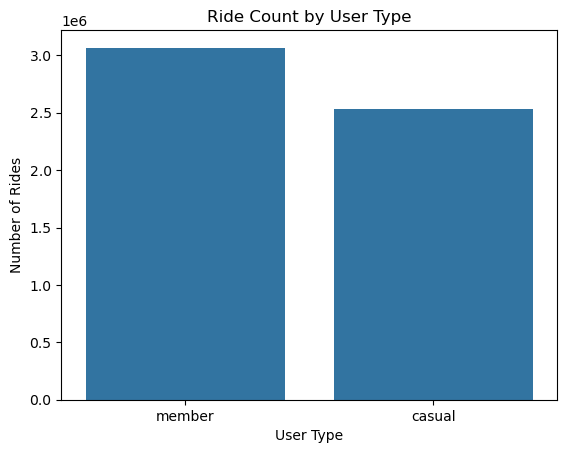

In [38]:
# Member vs. Casual Ride Count
sns.countplot(data=df, x='member_casual')
plt.title('Ride Count by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.show()

##### Observation
Members make slightly more rides compared to casual riders, indicating both user groups are active and relevant.

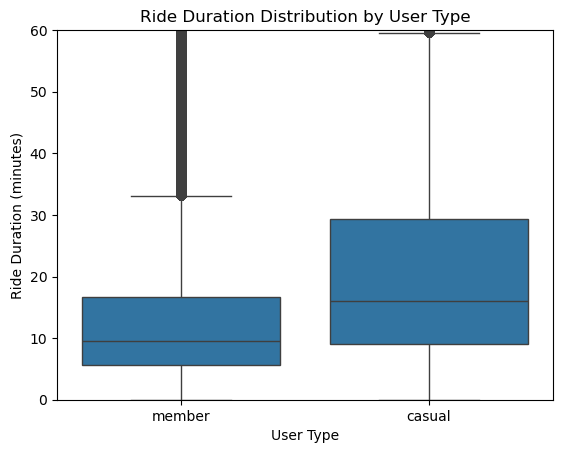

In [40]:
# Ride Duration by User Type
sns.boxplot(data=df, x='member_casual', y='ride_duration')
plt.title('Ride Duration Distribution by User Type')
plt.ylim(0, 60)
plt.xlabel('User Type')
plt.ylabel('Ride Duration (minutes)')
plt.show()

##### Observation
- Casual users tend to take longer rides on average, suggesting leisure-oriented usage.
- Members ride for shorter, consistent durations, most likely for commuting.

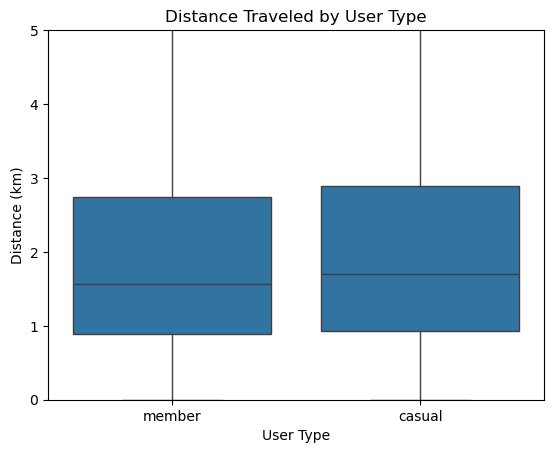

In [42]:
# Distance by User Type
sns.boxplot(data=df, x='member_casual', y='distance')
plt.title('Distance Traveled by User Type')
plt.ylim(0, 5)
plt.xlabel('User Type')
plt.ylabel('Distance (km)')
plt.show()

##### Observation
Casual riders travel slightly longer distances on average, but the overall distribution is quite similar between the two groups. This suggests that both members and casuals tend to ride comparable distances, with casuals showing a mild tendency toward longer leisure rides.

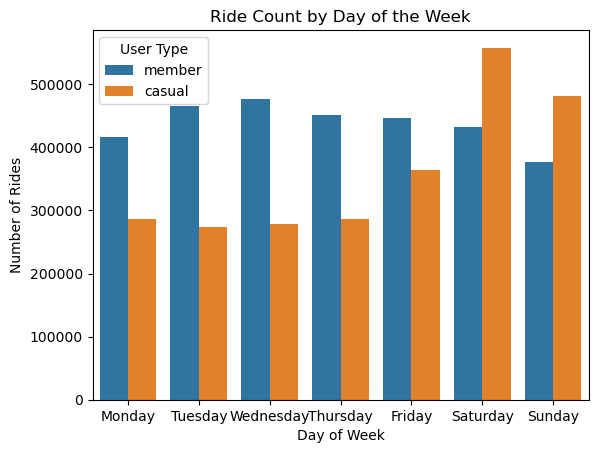

In [44]:
# Rides by Day of Week
sns.countplot(data=df, x='day_of_week', hue='member_casual',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ride Count by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.show()

#####  Observation
Casual riders show strong preference for weekends, while member usage is more evenly distributed throughout the week.

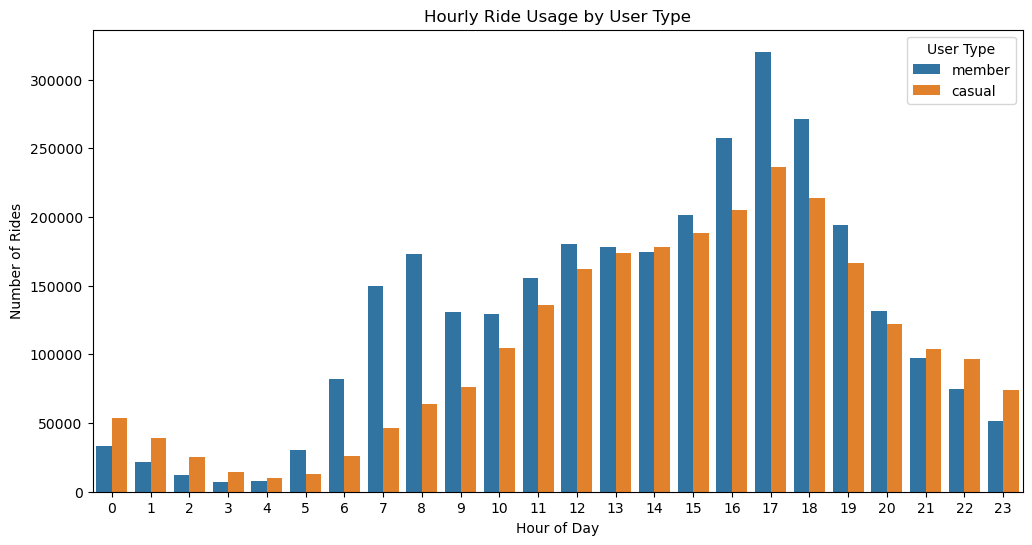

In [47]:
# Hour of Day Usage
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='member_casual', dodge=True)
plt.title('Hourly Ride Usage by User Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.legend(title='User Type')
plt.show()

##### Observation
- Both casual and member riders show a clear peak in ride activity around 5 PM.
- However, members ride more consistently across the workday, suggesting commuting behavior.
- Casual riders show higher activity during midday and evening hours (11 AM–7 PM), likely reflecting recreational use.

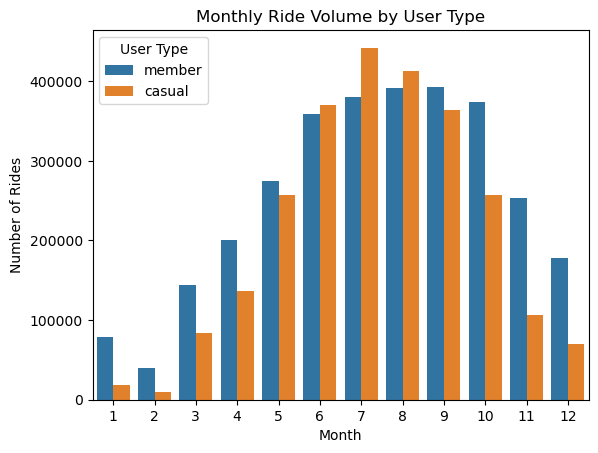

In [49]:
# Monthly Seasonality
sns.countplot(data=df, x='month', hue='member_casual')
plt.title('Monthly Ride Volume by User Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.show()

##### Observation
Casual rider usage peaks during summer (June–September), while members ride year-round, though they also drop slightly in winter.

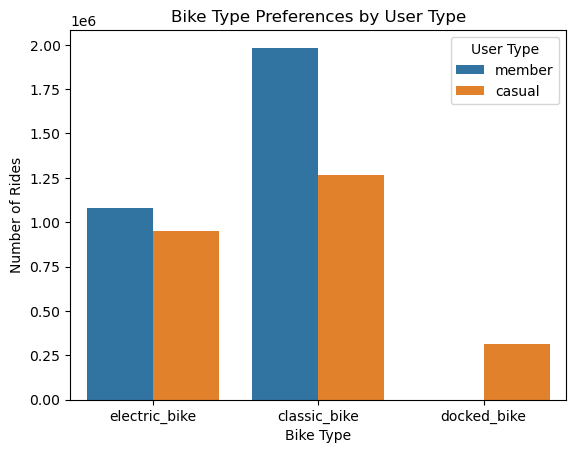

In [51]:
# Rideable Type Preferences
sns.countplot(data=df, x='rideable_type', hue='member_casual')
plt.title('Bike Type Preferences by User Type')
plt.xlabel('Bike Type')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.show()

##### Observation
Classic bikes are the most preferred by both user groups.

### Conclusion & Recommendations

---

#### Key Findings:

1. **User Composition:**
   - Members made up ~55% of the total rides, while casual riders accounted for ~45%.
   - Suggests an opportunity to convert casual riders into long-term members.

2. **Ride Duration & Distance:**
   - Casual riders tend to take longer rides and travel slightly farther on average.
   - Indicates leisure-oriented usage among casuals vs. utilitarian commuting among members.

3. **Hourly Ride Patterns:**
   - Both groups peak at 5 PM, but casual riders show higher midday and evening activity (11 AM–6 PM).
   - Members show steadier patterns during work hours, reflecting commuting behavior.

4. **Weekly Trends:**
   - Casuals ride more on weekends, while members ride fairly consistently throughout the week.
   - Reinforces the leisure vs. commuter segmentation.

5. **Seasonal Trends:**
   - Casual usage spikes in summer (June–September), while member usage remains more consistent.
   - Winter months see a decline in rides from both user types.

6. **Bike Type Preference:**
   - Both casuals and members prefer classic bikes, but docked bikes are almost exclusively used by casuals.
   - Suggests docked bikes may be more associated with tourist or ad-hoc rides.

---

#### Recommendations for Cyclistic:

1. **Introduce Tiered Memberships:**
   - Offer flexible or seasonal passes targeted at **leisure riders**.
   - Include perks like **museum discounts**, **sports event tie-ins**, or **group ride passes**.

2. **Market to Casuals During Summer & Weekends:**
   - Run **campaigns in May–September** highlighting membership benefits.
   - Focus on **weekend plans** and encourage family/group usage.

3. **Highlight Value for Long Rides:**
   - Educate casuals that frequent long rides may cost more than a membership.
   - Use targeted messaging for riders with average trip duration >10 minutes.

4. **Capitalize on Peak Hours:**
   - For casuals: Promote **afternoon leisure rides**.
   - For members: Enhance service around **commute hours (8 AM / 5 PM)**.

5. **Emphasize Popular Bike Types:**
   - Use **classic bikes** as the visual face of your branding and marketing.
   - Consider optimizing docked bike availability in tourist-heavy zones.

6. **Add Referral or Guest Ride Incentives:**
   - Offer **free guest passes** or **referral rewards** to members to increase organic conversions.

---

This analysis supports data-driven decisions in marketing, product design, and service planning. The patterns observed can help Cyclistic increase member acquisition, boost engagement, and improve customer satisfaction across both user segments.
